## Trabalho de Programação Genética

### Professor:
- Prof. Dr. Carlos Alexandre Silva

### Componentes:

- Ivanete Fátima de Azevedo
- Fernando dos Santos Alves Fernandes

### Descrição do Trabalho:

O objetivo deste trabalho é apresentar exemplos de uso de Algoritmos Genéticos e Programação Genética no desenvolvimento de jogos.

### Inicialmente, vamos apresentar um exemplo de aplicação de Algoritmos Genéticos:

A ideia é criar Personagens para um jogo fictício baseado na competição **`Ultimate Beastmaster`**.

No Ultimate Beastmaster, os competidores passam por provas que exigem habilidade, agilidade, destreza, força, coordenação e velocidade em um cenário cheio de obstáculos.

![Ultimate Beastmaster](https://upload.wikimedia.org/wikipedia/en/0/05/Ultimate_Beastmaster_Titlecard.jpg)

#### 1. Importações de bibliotecas:

O código começa importando as bibliotecas necessárias para executar o algoritmo genético:

- **random**: Geração de números aleatórios.
- **numpy**: Manipulação de arrays.
- **PIL**: Processamento de imagens.
- **pydenticon**: Geração de identicons.
- **deap**: Biblioteca para implementar o algoritmo genético.
- **matplotlib**: Criação de gráficos.
- **pandas**: Manipulação de dados em tabelas.
- **warnings**: Controle de avisos.

#### 2. Criação das classes `FitnessMax` e `Personagem`:

O código define as classes **`FitnessMax`** e **`Personagem`** usando a biblioteca **`deap`**. A classe **`FitnessMax`** armazena a pontuação de cada indivíduo (personagem), enquanto a classe **`Personagem`** representa os indivíduos com suas habilidades representadas por uma lista de genes ('A', 'D', 'F', 'C' e 'V'): Agilidade - Destreza - Força - Coordenacao - Velocidade.

#### 3. Registro das funções no `toolbox`:

O **`toolbox`** é uma ferramenta auxiliar para o algoritmo genético. As principais funções precisam ser registradas, como a geração de um gene aleatório ('A', 'D', 'F', 'C' ou 'V'), a criação de um indivíduo (personagem) com uma lista de genes e a criação de uma população composta por vários indivíduos (personagens).

#### 4. Definição das funções de avaliação e cálculo de distância:

São definidas duas funções adicionais:
- **`avaliar_personagem`**: Recebe um personagem e avalia suas habilidades com base nos genes presentes na lista. Retorna a pontuação do personagem.
- **`calcular_distancia`**: Calcula a distância genética entre dois indivíduos (personagens), ou seja, quantos genes eles têm diferentes.

#### 5. Evolução com elitismo e criação da tabela:

A função **`evolucao_com_tabela`** realiza a evolução da população de personagens usando um algoritmo genético com elitismo (os melhores indivíduos são mantidos) e cria uma tabela para armazenar informações sobre os melhores personagens encontrados em cada geração.

#### 6. Parâmetros e execução da evolução:

São definidos alguns parâmetros para o algoritmo genético, como tamanho da população, número de gerações, chances de cruzamento e mutação, e taxa de elitismo. A população inicial é criada e a função **`evolucao_com_tabela`** é chamada para executar o algoritmo genético e obter a tabela com os melhores personagens encontrados.

#### 7. Gerar imagem identicon:

O código define a função **`gerar_imagem_identicon`** para criar uma imagem "identicon" para o melhor personagem encontrado na última geração. O identicon é gerado com base no nome do personagem, usando a biblioteca **`pydenticon`**.


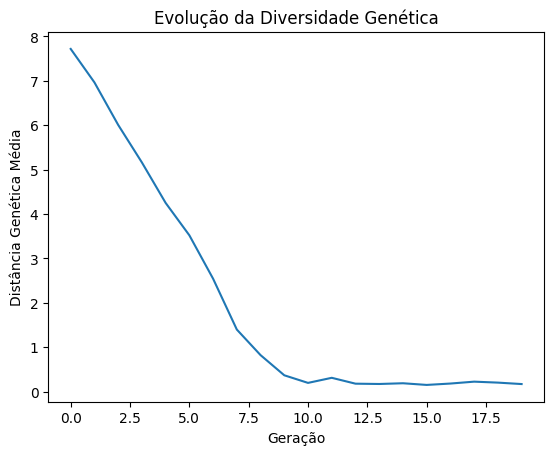

    Geração                   Nome  Pontuação
0         1        Flavius Quintus       92.0
1         2      Flavius Marcellus       94.0
2         3  Valerius Constantinus       96.0
3         4       Valerius Quintus       98.0
4         5          Maximus Titus       99.0
5         6      Septimus Aurelian      100.0
6         7         Julius Cassius      100.0
7         8      Valerius Corvinus      100.0
8         9         Julius Cassius      100.0
9        10  Tiberius Constantinus      100.0
10       11       Flavius Lucullus      100.0
11       12       Decimus Aurelian      100.0
12       13           Julius Titus      100.0
13       14      Septimus Corvinus      100.0
14       15        Julius Aurelian      100.0
15       16         Valerius Titus      100.0
16       17    Julius Constantinus      100.0
17       18       Flavius Aurelian      100.0
18       19   Flavius Constantinus      100.0
19       20       Decimus Aurelian      100.0


In [1]:
import random
import string
import numpy as np
from PIL import Image
from io import BytesIO
import pydenticon
from deap import base, creator, tools
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Função temporária para ignorar avisos
def noop(*args, **kwargs):
    pass

# Salvar a função original e substituir por nossa função temporária
original_warn = warnings.warn
warnings.warn = noop

# Verificar se as classes já foram registradas anteriormente
if not hasattr(creator, 'FitnessMax'):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))

if not hasattr(creator, 'Personagem'):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        creator.create("Personagem", list, fitness=creator.FitnessMax)

# Restaurar a função original após o registro das classes
warnings.warn = original_warn


def gerar_nome_guerreiro():
    prefixos = ["Maximus", "Decimus", "Flavius", "Valerius", "Julius", "Aurelius", "Septimus", "Tiberius"]
    sufixos = ["Aurelian", "Cassius", "Marcellus", "Quintus", "Corvinus", "Titus", "Constantinus", "Lucullus"]
    return random.choice(prefixos) + " " + random.choice(sufixos)

def avaliar_personagem(personagem):
    habilidade_agilidade = 0
    habilidade_destreza = 0
    habilidade_forca = 0
    habilidade_coordenacao = 0
    habilidade_velocidade = 0

    for gene in personagem:
        if gene == 'A':
            habilidade_agilidade += 1
        elif gene == 'D':
            habilidade_destreza += 1
        elif gene == 'F':
            habilidade_forca += 1
        elif gene == 'C':
            habilidade_coordenacao += 1
        elif gene == 'V':
            habilidade_velocidade += 1

    pontuacao = (habilidade_agilidade * 10) + (habilidade_destreza * 8) + (habilidade_forca * 6) + (habilidade_coordenacao * 9) + (habilidade_velocidade * 7)

    return pontuacao,

def calcular_distancia(ind1, ind2):
    distancia = sum(gene1 != gene2 for gene1, gene2 in zip(ind1, ind2))
    return distancia

tamanho_max_personagem = 10

toolbox = base.Toolbox()
toolbox.register("gene", random.choice, "ADFCV")
toolbox.register("personagem", tools.initRepeat, creator.Personagem, toolbox.gene, n=tamanho_max_personagem)
toolbox.register("populacao", tools.initRepeat, list, toolbox.personagem)

toolbox.register("evaluate", avaliar_personagem)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Função para evolução com elitismo e criação da tabela
def evolucao_com_tabela(populacao, tamanho_populacao, numero_geracoes, chance_mutacao, elitismo_ratio):
    distancias_geneticas = []

    for individuo in populacao:
        individuo.fitness.values = toolbox.evaluate(individuo)

    colunas_tabela = ['Geração', 'Nome', 'Pontuação']
    tabela_melhores_personagens = pd.DataFrame(columns=colunas_tabela)

    for geracao in range(numero_geracoes):
        selecionados = toolbox.select(populacao, len(populacao))
        filhos = [toolbox.clone(ind) for ind in selecionados]

        for filho1, filho2 in zip(filhos[::2], filhos[1::2]):
            if random.random() < chance_cruzamento:
                toolbox.mate(filho1, filho2)
                del filho1.fitness.values, filho2.fitness.values

        for individuo in filhos:
            if random.random() < chance_mutacao:
                toolbox.mutate(individuo)
            del individuo.fitness.values

        for individuo in filhos:
            individuo.fitness.values = toolbox.evaluate(individuo)

        melhores_individuos = tools.selBest(populacao, int(tamanho_populacao * elitismo_ratio))
        filhos.extend(melhores_individuos)

        populacao[:] = filhos

        distancias = []
        for i, ind1 in enumerate(populacao):
            for ind2 in populacao[i+1:]:
                distancia = calcular_distancia(ind1, ind2)
                distancias.append(distancia)
        distancia_genetica_media = np.mean(distancias)
        distancias_geneticas.append(distancia_genetica_media)

        # Identificar o melhor personagem encontrado na geração atual
        melhor_personagem = tools.selBest(populacao, 1)[0]
        nome_personagem = gerar_nome_guerreiro()
        pontuacao_personagem = melhor_personagem.fitness.values[0]

        # Adicionar os dados do melhor personagem à tabela
        dados_personagem = [geracao + 1, nome_personagem, pontuacao_personagem]
        tabela_melhores_personagens.loc[len(tabela_melhores_personagens)] = dados_personagem

    # Plotar o gráfico da distância genética média ao longo das gerações
    plt.plot(distancias_geneticas)
    plt.xlabel('Geração')
    plt.ylabel('Distância Genética Média')
    plt.title('Evolução da Diversidade Genética')
    plt.show()

    return tabela_melhores_personagens

# Parâmetros
tamanho_populacao = 100
numero_geracoes = 20
chance_cruzamento = 0.8
chance_mutacao = 0.2
elitismo_ratio = 0.1

populacao = toolbox.populacao(n=tamanho_populacao)

tabela_melhores_personagens = evolucao_com_tabela(populacao, tamanho_populacao, numero_geracoes, chance_mutacao, elitismo_ratio)

# Exibir a tabela dos melhores personagens
print(tabela_melhores_personagens)

# Gerar imagem identicon do melhor personagem encontrado
def gerar_imagem_identicon(nome):
    generator = pydenticon.Generator(5, 5, foreground=(255, 0, 0, 255), background=(255, 255, 255, 255))
    identicon_data = generator.generate(nome, 100, 100)
    image = Image.open(BytesIO(identicon_data))
    image.save(f"{nome}.png")
    image.show()

# Obter o nome do melhor personagem da última geração


### Vejamos, agora, um exemplo de aplicação de Programação Genética:

O  **`Robot Auto Racing Simulator (RARS)`** ([https://rars.sourceforge.net](https://rars.sourceforge.net)) foi uma das primeiras plataformas utilizadas por pesquisadores e entusiastas de jogos e e Inteligência Artificial, para comparação de desempenho de algoritmos controladores de veículos:
- Criado em 1995; desenvolvido em C++; torneios regulares entre 1995 e 2004;
- Emprega conceitos físicos detalhados: forças de aceleração e desaceleração, atrito, força centrípeta, etc.
- Genectic Algorithms (AG), Artificial Neural Network (ANN), Neural Evolution of Augmenting Topology (NEAT);
- Otimizar parâmetros do mundo real, encontrar trajetórias ótimas, evolução de sistemas de alerta de colisão;
- [TORCS (The Open Race Car Simulator)](https://torcs.sourceforge.net/index.php?name=Sections&op=viewarticle&artid=1): funções de classificação Fuzzy para criação de controladores; otimização de parâmetros; rtNEAT para evolução de controladores em pistas totalmente desconhecidas.

![RARS](https://rars.sourceforge.net/spa_1st_bend.jpg)

Figura 1 - Robot Auto Racing Simulator (RARS) interface. Fonte: [RARS](https://rars.sourceforge.net/spa_1st_bend.jpg).

### Evoluindo um controlador de carro de corrida

#### 1. Conjunto de Terminais e Conjunto de Funções:
Conjunto de Terminais:
- **`Indicadores básicos de estado do jogo`**:
  - CR Current Radius: Radius of current track segment
  - NR Next Radius: Radius of next track segment
  - TE To End: Distance to end of current track segment
  - NL Next Length: Length of next track segment
  - V Velocity: Current velocity of car
  - NV Normal Velocity: Drift speed towards road shoulder
  - TL To Left: Distance to left road shoulder
  - TR to Right: Distance to right road shoulder
  - TW Track Width
- **`Indicadores complexos de estado do jogo`**:
  - AH AHead: Distance car can move in its current heading without veering off road
  - AA Ahead Angle: Angle of road shoulder, relative to car's heading, found by AH terminal
- **`Constantes numéricas`**:
  - ERC Ephemeral Random Constant
  - 0 Zero constant
  - 1 One constant

 ![indicators](indicators.PNG) 

Figura 2 - Indicadores básicos e complexos de estado do jogo. Fonte: Sipper.

Conjunto de Funções:
- **`Funções matemáticas`**:
  - +(x, y) Adds x and y
  - -(x, y) Subtracts y from x
  - *(x, y) Multiplies x by y
  - %(x, y) Safe-divide x by y: if y = 0, returns 0, otherwise returns the division of x by y
  - abs(x) Absolute value of x
  - neg(x) Negative value of x
  - tan(x) Tangent of x
- **`Sentenças condicionais`**
  - IFG(x, y, $\alpha$, $\beta$) If x > y, returns $\alpha$, otherwise returns $\beta$
  - IFP(x, $\alpha$, $\beta$) If x is positive, returns $\alpha$, otherwise returns $\beta$

Exemplo de expressão para cálculo do ângulo da rodas (direção), $\alpha$:

**`(% (% (% (% (IFG 0.702 AH AA (* NV -0.985)) (- AH (neg AH))) (-(% 1.0 (% V AH)) (neg AH))) (- (- (* NV (neg NV)) (neg AH)) (neg AH))) (- (% 1.0 (% V AH)) (neg (% (% 1.0 (% V AH)) (% V AH)))))`**

Exemplo de expressão para o cálculo do valor de velocidade, $v$:

**`(IFP (abs (% V AH)) (- (% 1.0 (% V AH)) (neg (- (* NV (* NV -0.868)) (neg AH)))) (% (neg (- (- (* NV (neg TR)) (neg AH)) (neg AH))) ( - (% 1.0 (% V AH)) (neg (% (* NV (neg NV)) (% V AH))))))`**

#### 2. Função de Aptidão (*Fitness*):
- Seleção da pista: *`SEPANG TRACK`*. Pistas mais homogêneas (ovais) favorecem indivíduos especialista; pistas heterogêneas favorecem indivíduos mais generalistas.
![sepang track](sepang.PNG)

Figura 3 - Pista selecionada: *Sepang track*. Fonte: Sipper.
- Funções de aptidão:
  - *Race Distance (GP-Single-1)*: Distância percorrida durante período de 250 segundos (do jogo); maximizar valor de aptidão dos indivíduos.
  - *Modified Race Time (GP-Single-2)*: tempo para completar uma volta; indivíduo com a volta mais rápida é considerado mais apto; se ambos não terminaram a corrida, considera-se que o que percorreu maior distância é mais apto.

*Obs.: A função de fitness retorna o ângulo de direção ($\alpha$) e o valor da velocidade ($v$)*:

- $\alpha = \psi * (\frac{1}{2AH} * \frac{1}{\frac{AH}{V} + AH} * \frac{1}{2AH - NV^{2}} * \frac{1}{\frac{AH}{V}-(\frac{AH}{V})^{2}})$, onde:
  - $\psi = \begin{cases} AA & AH < 0.7 \\ -0.98 * NV & AH >= 0.7 \end{cases}$
- $v = \|AH * (\frac{1}{V} - 1) + 0.87 * NV^{2}\|$

#### 3. Parâmetros de Execução
Valores dos parâmetros definidos por meio de um processo de calibração:
- **`Creation of initial population`**: *Ramped-half-and-half (full, grow)*
- **`Population size`**: 250 indivíduos;
- **`Generation limit`**: 255 gerações; pico de desempenho entre 100 e 200 gerações.
- **`Selection method`**: método de seleção por torneio com 3 indivíduos; escolha aleatória entre os indivíduos da população e seleção do mais apto entre os 3 escolhidos.
- **`Breeding operators`**:
  - *Reproduction*: 0.4
  - *Crossover*: 0.5
  - *Structural mutation*: 0.05
  - **`ERC`** *mutation*: 0.05

### Resultados e Análise da Evolução

![Race Disntace fitness](race-distance-fitness.PNG)

Figura 4 - Melhores valores de aptidão em cada geração, versus aptidão média da população em cada geração (*Race Distance fitness*). Fonte: Sipper.

![Modified Race Time fitness](modified-race-time-fitness.PNG)

Figura 5 - Melhores valores de aptidão em cada geração, versus aptidão média da população em cada geração (*Modified Race Time fitness*). Fonte: Sipper.

![Rank for Sepang track](rank-sepang-track.PNG)

Figura 6 - Comparação dos pilotos evoluídos na pista Sepang, para 100 exeucações por piloto e cálculo da média dos tempos de volta. Fonte: Sipper.

### Bibliografia

- Wikipedia. Ultimate Beastmaster, 2023. Disponível em: [https://en.wikipedia.org/wiki/Ultimate_Beastmaster](https://en.wikipedia.org/wiki/Ultimate_Beastmaster).
- Sipper, M.. Evolved to Win, Lulu, 2011. Disponível em: [https://www.moshesipper.com/uploads/3/0/8/3/30831095/evolvedtowin.pdf](https://www.moshesipper.com/uploads/3/0/8/3/30831095/evolvedtowin.pdf).
- Poli, R.; Langdon, W. B; McPhee, N. F.. A field guide to genetic programming, 2008. Disponível em [http://www.gp-field-guide.org.uk](http://www.gp-field-guide.org.uk).